In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue
import time

# Define the grid size and create a grid
grid_size = 15
grid = np.zeros((grid_size, grid_size))

# Define start location for the robot
start = (0, 0)
current_location = start

# Define locations for buildings and houses
buildings = [(2, 3), (4, 5), (6, 8)]
houses = [(10, 12), (2, 7)]
vehicles=[(5,10), (10,6)]
# Generate delivery points randomly
num_delivery_points = 5
delivery_points = []
for _ in range(num_delivery_points):
    x = np.random.randint(grid_size)
    y = np.random.randint(grid_size)
    while (x, y) in buildings or (x, y) in houses or (x, y) in delivery_points:
        x = np.random.randint(grid_size)
        y = np.random.randint(grid_size)
    delivery_points.append((x, y))

# Mark buildings, houses, and delivery points on the grid
for building in buildings:
    grid[building[0], building[1]] = 1

for house in houses:
    grid[house[0], house[1]] = 2

for point in delivery_points:
    grid[point[0], point[1]] = 3

for vehicle in vehicles:
    grid[house[0], house[1]] = 4

# Visualize the initial grid
plt.imshow(grid, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('City Area with Obstacles and Delivery Points')
plt.show()

# Define Best First Search algorithm
def best_first_search(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    came_from[start] = None

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next in get_neighbors(current, grid):
            if next not in came_from:
                priority = heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from

def get_neighbors(current, grid):
    neighbors = []
    x, y = current
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx != 0 or dy != 0:
                if 0 <= x + dx < len(grid) and 0 <= y + dy < len(grid[0]) and grid[x + dx][y + dy] != 1:
                    neighbors.append((x + dx, y + dy))
    return neighbors

def heuristic(current, goal):
    x1, y1 = current
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)

# Define function to find path to delivery points sequentially
def find_path_to_delivery_points(start, delivery_points, grid):
    path_to_points = {}
    current_location = start
    for idx, point in enumerate(delivery_points):
        came_from = best_first_search(current_location, point, grid)
        path = []
        current = point
        while current != current_location:
            path.append(current)
            current = came_from[current]
        path.append(current_location)
        path.reverse()
        path_to_points[idx + 1] = path
        current_location = point
    return path_to_points

# Find paths to delivery points sequentially
paths_to_delivery_points = find_path_to_delivery_points(current_location, delivery_points, grid)



def update_grid(current_location, path, point_idx, buildings, houses, vehicles):
    # Create a new grid with existing obstacles
    grid = np.zeros((grid_size, grid_size))

    # Mark buildings, houses, delivery points, and vehicles on the grid
    for building in buildings:
        grid[building[0], building[1]] = 1
    for house in houses:
        grid[house[0], house[1]] = 2
    for point in delivery_points:
        grid[point[0], point[1]] = 3
    for vehicle in vehicles:
        grid[vehicle[0], vehicle[1]] = 4

    # Mark the robot's movement and final delivery point on the grid
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i + 1]
        grid[x1, y1] = 5  # Mark the current cell as visited
        grid[x2, y2] = 4  # Mark the next cell as the robot's current location

    grid[path[-1][0], path[-1][1]] = 3  # Mark the final cell as the delivery point

    # Visualize the grid with the complete path and obstacles
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Robot Movement: Point {point_idx}')
    plt.show()

# Display the complete path for each point
for point_idx in paths_to_delivery_points:
    path = paths_to_delivery_points[point_idx]
    update_grid(current_location, path, point_idx, buildings, houses, vehicles)
    current_location = path[-1]  # Update current location for the next point







SystemExit: 0

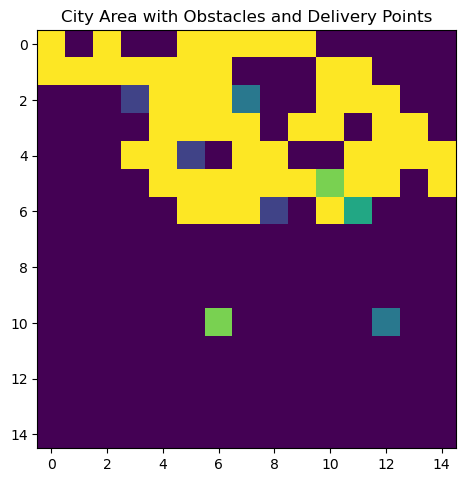

In [2]:
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QPushButton
import numpy as np
from queue import PriorityQueue
import time
import math

# Define the grid size and create a grid
grid_size = 15
grid = np.zeros((grid_size, grid_size))

# Define start location for the robot
start = (0, 0)
current_location = start

# Define locations for buildings, houses, delivery points, and vehicles
buildings = [(2, 3), (4, 5), (6, 8)]
houses = [(10, 12), (2, 7)]
vehicles = [(5, 10), (10, 6)]

# Generate delivery points randomly
num_delivery_points = 5
delivery_points = []
for _ in range(num_delivery_points):
    x = np.random.randint(grid_size)
    y = np.random.randint(grid_size)
    while (x, y) in buildings or (x, y) in houses or (x, y) in delivery_points:
        x = np.random.randint(grid_size)
        y = np.random.randint(grid_size)
    delivery_points.append((x, y))

# Mark buildings, houses, delivery points, and vehicles on the grid
for building in buildings:
    grid[building[0], building[1]] = 1

for house in houses:
    grid[house[0], house[1]] = 2

for point in delivery_points:
    grid[point[0], point[1]] = 3

for vehicle in vehicles:
    grid[vehicle[0], vehicle[1]] = 4

# Define Best First Search algorithm
def best_first_search(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + random_cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from

# Define A* Search algorithm
def a_star_search(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + random_cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from
    
def get_neighbors(current, grid):
    neighbors = []
    x, y = current
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx != 0 or dy != 0:
                if 0 <= x + dx < len(grid) and 0 <= y + dy < len(grid[0]) and grid[x + dx][y + dy] != 1:
                    neighbors.append((x + dx, y + dy))
    return neighbors

def heuristic(current, goal):
    x1, y1 = current
    x2, y2 = goal
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)     

def random_cost(current, next):
    return np.random.randint(1, 21)  # Random cost between 1 and 20

# Define function to find path to delivery points sequentially
def find_path_to_delivery_points(start, delivery_points, grid):
    path_to_points_best_first = {}
    path_to_points_a_star = {}
    current_location = start
    
    for idx, point in enumerate(delivery_points):
        # Best First Search
        came_from_best_first = best_first_search(current_location, point, grid)
        path_best_first = []
        current_best_first = point
        while current_best_first != current_location:
            path_best_first.append(current_best_first)
            current_best_first = came_from_best_first[current_best_first]
        path_best_first.append(current_location)
        path_best_first.reverse()
        path_to_points_best_first[idx + 1] = path_best_first
        current_location = point
        
        # A* Search
        came_from_a_star = a_star_search(current_location, point, grid)
        path_a_star = []
        current_a_star = point
        while current_a_star != current_location:
            path_a_star.append(current_a_star)
            current_a_star = came_from_a_star[current_a_star]
        path_a_star.append(current_location)
        path_a_star.reverse()
        path_to_points_a_star[idx + 1] = path_a_star
        current_location = point
    
    return path_to_points_best_first, path_to_points_a_star


# Define the PyQt5 window class
class RobotMovementWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle('Robot Movement Visualization')
        self.setGeometry(100, 100, 800, 600)

        # Create a Matplotlib figure and canvas
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)

        # Create a button to start the robot movement animation
        self.start_button = QPushButton('Start Robot Movement', self)
        self.start_button.clicked.connect(self.animate_robot_movement)

        # Create a vertical layout for the widgets
        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.start_button)

        # Create a central widget to set the layout
        central_widget = QWidget()
        central_widget.setLayout(layout)
        self.setCentralWidget(central_widget)

        # Visualize the initial grid
        self.update_grid()

    def update_grid(self):
        self.ax.clear()
        self.ax.imshow(grid, cmap='viridis', interpolation='nearest')
        self.ax.set_title('City Area with Obstacles and Delivery Points')
        self.canvas.draw()

    def animate_robot_movement(self):
     paths_to_delivery_points = find_path_to_delivery_points(current_location, delivery_points, grid)
     paths_best_first, paths_a_star = paths_to_delivery_points
    
     for point_idx in paths_best_first:
        path_best_first = paths_best_first[point_idx]
        path_a_star = paths_a_star[point_idx]

        # Now you can use path_best_first and path_a_star as needed
        self.update_grid()  # Update the grid visualization
        for i in range(len(path_best_first) - 1):
            x1, y1 = path_best_first[i]
            x2, y2 = path_best_first[i + 1]
            grid[x1, y1] = 5  # Mark the current cell as visited
            grid[x2, y2] = 4  # Mark the next cell as the robot's current location
            self.update_grid()  # Update the grid visualization
            QApplication.processEvents()  # Allow the GUI to update
            time.sleep(0.5)  # Pause for visualization (adjust as needed)
        self.current_location = path_best_first[-1]  # Update current location for the next point
        grid[self.current_location[0], self.current_location[1]] = 3  # Mark the final cell as the delivery point
        self.update_grid()  # Update the grid visualization
        QApplication.processEvents()  # Allow the GUI to update
        time.sleep(1)  # Pause for visualization (adjust as needed)

# Create the PyQt5 application and window
app = QApplication(sys.argv)
window = RobotMovementWindow()
window.show()
sys.exit(app.exec_())


In [ ]:
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QPushButton
import numpy as np
from queue import PriorityQueue
import time
import math

# Define the grid size and create a grid
grid_size = 15
grid = np.zeros((grid_size, grid_size))

# Define start locations for the robots
robots = [(0, 0), (12, 0)]  # Example with two robots
current_locations = robots.copy()

# Define locations for buildings, houses, delivery points, and vehicles
buildings = [(2, 3), (4, 5), (6, 8)]
houses = [(10, 12), (2, 7)]
vehicles = [(5, 10), (10, 6)]

# Generate delivery points randomly
num_delivery_points = 5
delivery_points = []
for _ in range(num_delivery_points):
    x = np.random.randint(grid_size)
    y = np.random.randint(grid_size)
    while (x, y) in buildings or (x, y) in houses or (x, y) in delivery_points:
        x = np.random.randint(grid_size)
        y = np.random.randint(grid_size)
    delivery_points.append((x, y))

# Mark buildings, houses, delivery points, and vehicles on the grid
for building in buildings:
    grid[building[0], building[1]] = 1

for house in houses:
    grid[house[0], house[1]] = 2

for point in delivery_points:
    grid[point[0], point[1]] = 3

for vehicle in vehicles:
    grid[vehicle[0], vehicle[1]] = 4

# Define Best First Search algorithm
def best_first_search(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + random_cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from

# Define A* Search algorithm
def a_star_search(start, goal, grid):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + random_cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from

def get_neighbors(current, grid):
    neighbors = []
    x, y = current
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx != 0 or dy != 0:
                if 0 <= x + dx < len(grid) and 0 <= y + dy < len(grid[0]) and grid[x + dx][y + dy] != 1:
                    neighbors.append((x + dx, y + dy))
    return neighbors

def heuristic(current, goal):
    x1, y1 = current
    x2, y2 = goal
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def random_cost(current, next):
    return np.random.randint(1, 21)  # Random cost between 1 and 20

# Define function to find path to delivery points for each robot
def find_paths_for_robots(robots, delivery_points, grid):
    paths_for_robots = {}
    for robot_idx, start in enumerate(robots, 1):
        paths_for_robot = {}
        for idx, point in enumerate(delivery_points):
            # A* Search for each robot
            came_from = a_star_search(start, point, grid)
            path = []
            current = point
            while current != start:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            paths_for_robot[idx + 1] = path
        paths_for_robots[robot_idx] = paths_for_robot
    return paths_for_robots

# Define the PyQt5 window class
class RobotMovementWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle('Robot Movement Visualization')
        self.setGeometry(100, 100, 800, 600)

        # Create a Matplotlib figure and canvas
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)

        # Create a button to start the robot movement animation
        self.start_button = QPushButton('Start Robot Movement', self)
        self.start_button.clicked.connect(self.animate_robot_movement)

        # Create a vertical layout for the widgets
        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.start_button)

        # Create a central widget to set the layout
        central_widget = QWidget()
        central_widget.setLayout(layout)
        self.setCentralWidget(central_widget)

        # Visualize the initial grid
        self.update_grid()

    def update_grid(self):
        self.ax.clear()
        self.ax.imshow(grid, cmap='viridis', interpolation='nearest')
        self.ax.set_title('City Area with Obstacles and Delivery Points')
        self.canvas.draw()

    def animate_robot_movement(self):
         paths_for_robots = find_paths_for_robots(robots, delivery_points, grid)
         colors = ['blue', 'green']  # Example colors for each robot
         for robot_idx, (color, paths_for_robot) in enumerate(zip(colors, paths_for_robots.values()), 1):
          current_location = robots[robot_idx - 1]
          for point_idx, path in paths_for_robot.items():
            for i in range(len(path) - 1):
                x1, y1 = path[i]
                x2, y2 = path[i + 1]
                grid[x1, y1] = 5  # Mark the current cell as visited
                grid[x2, y2] = robot_idx  # Mark the next cell as the robot's current location with its index
                self.update_grid()  # Update the grid visualization
                QApplication.processEvents()  # Allow the GUI to update
                time.sleep(0.5)  # Pause for visualization (adjust as needed)
            current_location = path[-1]  # Update current location for the next point
            grid[current_location[0], current_location[1]] = 3  # Mark the final cell as the delivery point
            self.update_grid()  # Update the grid visualization
            QApplication.processEvents()  # Allow the GUI to update
            time.sleep(1)  # Pause for visualization (adjust as needed)

# Create the PyQt5 application and window

app = QApplication(sys.argv)
window = RobotMovementWindow()
window.show()
app.exec_()
app.exit()